# Access CELLxGENE collaboration embeddings (scVI, Geneformer)

This notebook demonstrates basic access to CELLxGENE collaboration embeddings of CELLxGENE Discover Census. Currently, embeddings from scVI and a fine-tuned Geneformer model are maintained by CELLxGENE Discover. There are other CELLxGENE-hosted embeddings contributed by the community to CELLxGENE Discover, find out more about these in the [Census model page](https://cellxgene.cziscience.com/census-models).

**IMPORTANT:** This tutorial requires cellxgene-census package version 1.9.1 or later.

**Contents**

1. Quick start
1. Storage format
1. Query cells and load associated embeddings

⚠️ Note that the Census RNA data includes duplicate cells present across multiple datasets. Duplicate cells can be filtered in or out using the cell metadata variable `is_primary_data` which is described in the [Census schema](https://github.com/chanzuckerberg/cellxgene-census/blob/main/docs/cellxgene_census_schema.md#repeated-data).


## Quick start

CELLxGENE collaboration embeddings can easily be exported into an AnnData as shown below for any slice of Census. This example queries all cells from tongue tissue. 

⚠️ Note that Geneformer embeddings are only available for human data

In [1]:
import cellxgene_census

In [2]:
census_version = "2023-12-15"

In [3]:
emb_names = ["scvi", "geneformer"]

In [4]:
with cellxgene_census.open_soma(census_version=census_version) as census:
    adata = cellxgene_census.get_anndata(
        census,
        organism="homo_sapiens",
        measurement_name="RNA",
        obs_value_filter="tissue == 'tongue'",
        obs_embeddings=emb_names,
    )

In [5]:
adata

AnnData object with n_obs × n_vars = 372 × 60664
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [6]:
adata.X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
adata.obs.head()

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
0,51784858,53d208b0-2cfd-4366-9866-c3c6114081bc,Smart-seq2,EFO:0008931,basal cell,CL:0000646,38-year-old human stage,HsapDv:0000132,normal,PATO:0000461,...,cell,tongue,UBERON:0001723,tongue,UBERON:0001723,215344.0,229,940.366812,1.193676e+07,57042
1,51784859,53d208b0-2cfd-4366-9866-c3c6114081bc,Smart-seq2,EFO:0008931,basal cell,CL:0000646,38-year-old human stage,HsapDv:0000132,normal,PATO:0000461,...,cell,tongue,UBERON:0001723,tongue,UBERON:0001723,280289.0,285,983.470175,1.380632e+07,57042
2,51784860,53d208b0-2cfd-4366-9866-c3c6114081bc,Smart-seq2,EFO:0008931,fibroblast,CL:0000057,38-year-old human stage,HsapDv:0000132,normal,PATO:0000461,...,cell,tongue,UBERON:0001723,tongue,UBERON:0001723,807262.0,214,3772.252336,6.519344e+07,57042
3,51784861,53d208b0-2cfd-4366-9866-c3c6114081bc,Smart-seq2,EFO:0008931,fibroblast,CL:0000057,38-year-old human stage,HsapDv:0000132,normal,PATO:0000461,...,cell,tongue,UBERON:0001723,tongue,UBERON:0001723,396141.0,645,614.172093,6.108481e+06,57042
4,51784862,53d208b0-2cfd-4366-9866-c3c6114081bc,Smart-seq2,EFO:0008931,basal cell,CL:0000646,38-year-old human stage,HsapDv:0000132,normal,PATO:0000461,...,cell,tongue,UBERON:0001723,tongue,UBERON:0001723,295356.0,424,696.594340,1.175306e+06,57042


In [8]:
adata.var.head()

,soma_joinid,feature_id,feature_name,feature_length,nnz,n_measured_obs
0,0,ENSG00000233576,HTR3C2P,1057,69370,19581263
1,1,ENSG00000121410,A1BG,3999,5640476,62641311
2,2,ENSG00000268895,A1BG-AS1,3374,3071864,61946057
3,3,ENSG00000148584,A1CF,9603,734347,58195911
4,4,ENSG00000175899,A2M,6318,7894261,62704378


In [9]:
adata.obsm

AxisArrays with keys: scvi, geneformer

In [10]:
adata.obsm["scvi"]

array([[-5.7373047e-02,  7.9345703e-03, -2.7343750e-01, ...,
         4.0429688e-01, -7.1105957e-03,  9.9945068e-04],
       [-2.8906250e-01, -4.2724609e-04, -1.2060547e-01, ...,
         1.9824219e-01,  5.1498413e-04,  2.6550293e-03],
       [ 1.6328125e+00, -1.9775391e-02, -2.1093750e+00, ...,
         4.4726562e-01,  1.5945435e-03,  3.1280518e-03],
       ...,
       [-4.8828125e-01, -2.2949219e-02, -2.7812500e+00, ...,
         1.0000000e+00,  5.2185059e-03, -3.7231445e-03],
       [ 6.3671875e-01, -3.0395508e-02, -3.4218750e+00, ...,
         8.4765625e-01,  1.1230469e-02,  1.3305664e-02],
       [ 1.3437500e+00, -3.6376953e-02, -3.0937500e+00, ...,
         5.5859375e-01, -3.1433105e-03,  9.7656250e-03]], dtype=float32)

In [11]:
adata.obsm["geneformer"]

array([[ 0.11035156, -1.203125  ,  1.0078125 , ...,  0.20898438,
        -0.11816406, -0.98046875],
       [-1.046875  ,  1.1328125 ,  1.5234375 , ...,  0.984375  ,
        -0.78515625, -0.78125   ],
       [ 0.19042969, -2.265625  ,  2.234375  , ...,  0.41015625,
         0.53515625, -1.3359375 ],
       ...,
       [-0.27148438,  1.1953125 ,  2.125     , ...,  2.90625   ,
         0.58203125,  0.703125  ],
       [-0.64453125,  1.640625  ,  2.734375  , ...,  1.15625   ,
         0.21679688,  0.296875  ],
       [ 0.04077148,  0.7421875 ,  2.4375    , ...,  1.234375  ,
         0.55859375,  0.17773438]], dtype=float32)

## Storage format

Each embedding is encoded as a SOMA SparseNDArray, where:

* dimension 0 (`soma_dim_0`) encodes the cell (obs) `soma_joinid` value
* dimension 1 (`soma_dim_1`) encodes the embedding feature, and is in the range [0, N) where N is the number of features in the embedding
* data (`soma_data`) is float32

The first axis of the embedding array will have the same shape as the corresponding `obs` DataFrame for the Census build and experiment. The second axis of the embedding will have a shape (0, N) where N is the number of features in the embedding.

Embedding values, while stored as a float32, are precision reduced. Currently they are equivalent to a bfloat16, i.e., have 8 bits of exponent and 7 bits of mantissa.

## Query cells and load associated embeddings

This section demonstrates several methods to query cells from the Census by `obs` metadata, and then fetch embeddings associated with each cell.


### Loading embeddings into an AnnData `obsm` slot

There are two main ways to load CELLxGENE collaboration embeddings into an AnnData.

1. Via `cellxgene_census.get_anndata()`.
2. With a lazy query via `ExperimentAxisQuery`.

#### AnnData embeddings via `cellxgene_census.get_anndata()`

This is the simplest way of getting the embeddings. In this example we create an AnnData for all "central nervous system" cells.

In [13]:
import warnings

In [14]:
warnings.filterwarnings("ignore")

In [15]:
import scanpy

In [16]:
census_version = "2023-12-15"

In [17]:
emb_names = ["scvi", "geneformer"]

In [33]:
census = cellxgene_census.open_soma(census_version=census_version)

In [34]:
adata = cellxgene_census.get_anndata(
    census,
    organism="homo_sapiens",
    measurement_name="RNA",
    obs_value_filter="tissue_general == 'central nervous system'",
    # obs_column_names=["cell_type"],
    obs_embeddings=emb_names,
)

In [35]:
census.close()

In [36]:
adata

AnnData object with n_obs × n_vars = 31780 × 60664
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', 'raw_sum', 'nnz', 'raw_mean_nnz', 'raw_variance_nnz', 'n_measured_vars'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [37]:
adata.obs.head()

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id,raw_sum,nnz,raw_mean_nnz,raw_variance_nnz,n_measured_vars
0,8752190,c8f83821-a242-4ed7-86e9-7da077f5d348,10x 3' v3,EFO:0009922,ependymal cell,CL:0000065,34-year-old human stage,HsapDv:0000128,normal,PATO:0000461,...,nucleus,white matter of cerebellum,UBERON:0002317,central nervous system,UBERON:0001017,2374.0,1623,1.462723,4.991057,24817
1,8752191,c8f83821-a242-4ed7-86e9-7da077f5d348,10x 3' v3,EFO:0009922,astrocyte,CL:0000127,34-year-old human stage,HsapDv:0000128,normal,PATO:0000461,...,nucleus,white matter of cerebellum,UBERON:0002317,central nervous system,UBERON:0001017,917.0,640,1.432813,1.638671,24817
2,8752192,c8f83821-a242-4ed7-86e9-7da077f5d348,10x 3' v3,EFO:0009922,astrocyte,CL:0000127,34-year-old human stage,HsapDv:0000128,normal,PATO:0000461,...,nucleus,white matter of cerebellum,UBERON:0002317,central nervous system,UBERON:0001017,2241.0,1184,1.892736,5.527792,24817
3,8752193,c8f83821-a242-4ed7-86e9-7da077f5d348,10x 3' v3,EFO:0009922,astrocyte,CL:0000127,34-year-old human stage,HsapDv:0000128,normal,PATO:0000461,...,nucleus,white matter of cerebellum,UBERON:0002317,central nervous system,UBERON:0001017,1255.0,887,1.414882,4.256573,24817
4,8752194,c8f83821-a242-4ed7-86e9-7da077f5d348,10x 3' v3,EFO:0009922,astrocyte,CL:0000127,34-year-old human stage,HsapDv:0000128,normal,PATO:0000461,...,nucleus,white matter of cerebellum,UBERON:0002317,central nervous system,UBERON:0001017,1491.0,816,1.827206,5.340658,24817


In [38]:
adata.var.head()

,soma_joinid,feature_id,feature_name,feature_length,nnz,n_measured_obs
0,0,ENSG00000233576,HTR3C2P,1057,69370,19581263
1,1,ENSG00000121410,A1BG,3999,5640476,62641311
2,2,ENSG00000268895,A1BG-AS1,3374,3071864,61946057
3,3,ENSG00000148584,A1CF,9603,734347,58195911
4,4,ENSG00000175899,A2M,6318,7894261,62704378


Then we can take a quick look at the embeddings in a 2D scatter plot via UMAP.

In [39]:
scanpy.pp.neighbors(adata, use_rep="scvi")

In [40]:
scanpy.tl.umap(adata)

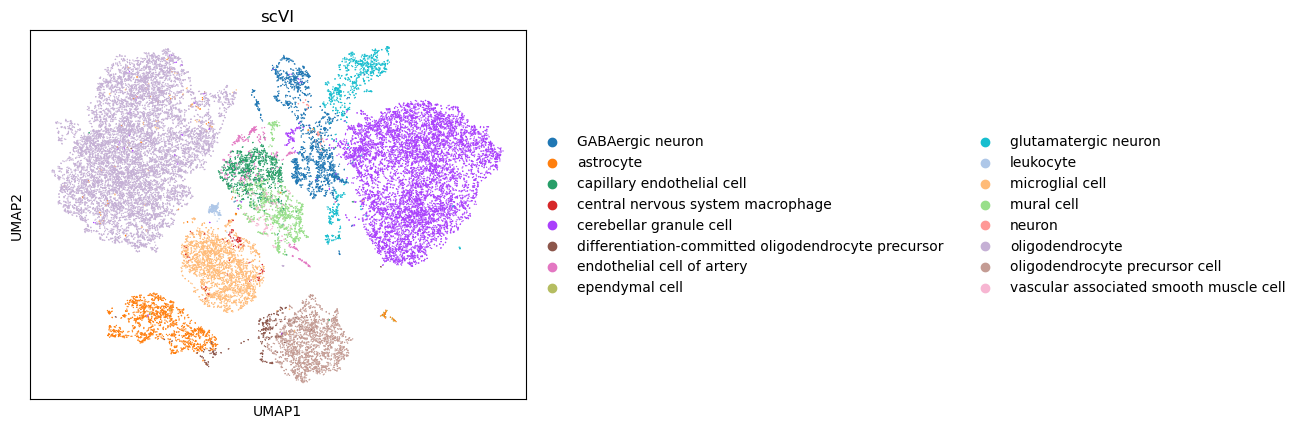

In [41]:
scanpy.pl.umap(adata, color="cell_type", title="scVI")

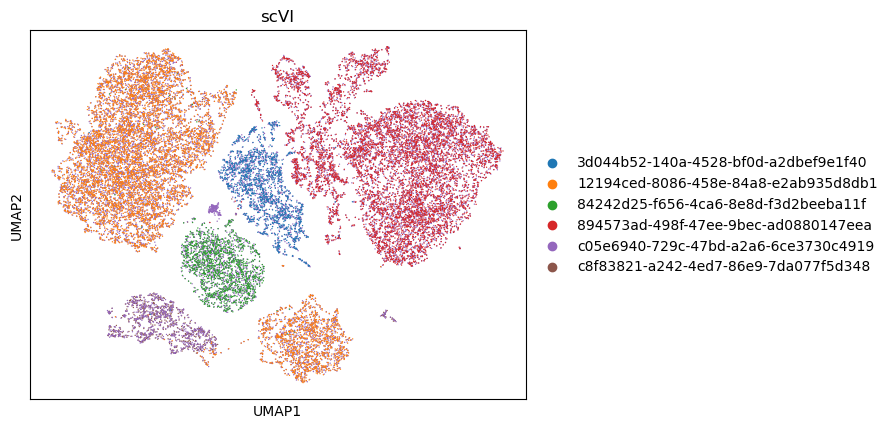

In [42]:
scanpy.pl.umap(adata, color="dataset_id", title="scVI")

In [43]:
scanpy.pp.neighbors(adata, use_rep="geneformer")

In [44]:
scanpy.tl.umap(adata)

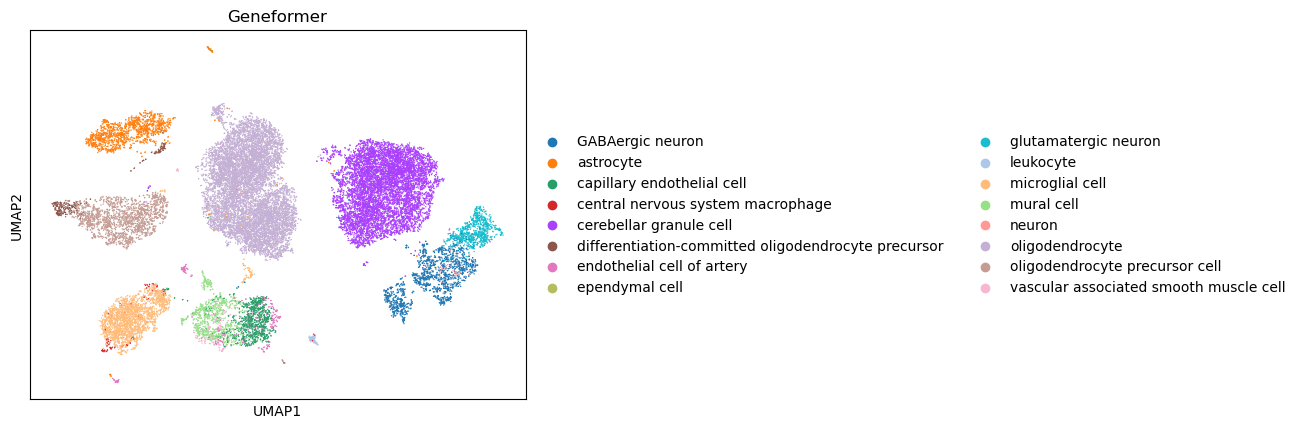

In [45]:
scanpy.pl.umap(adata, color="cell_type", title="Geneformer")

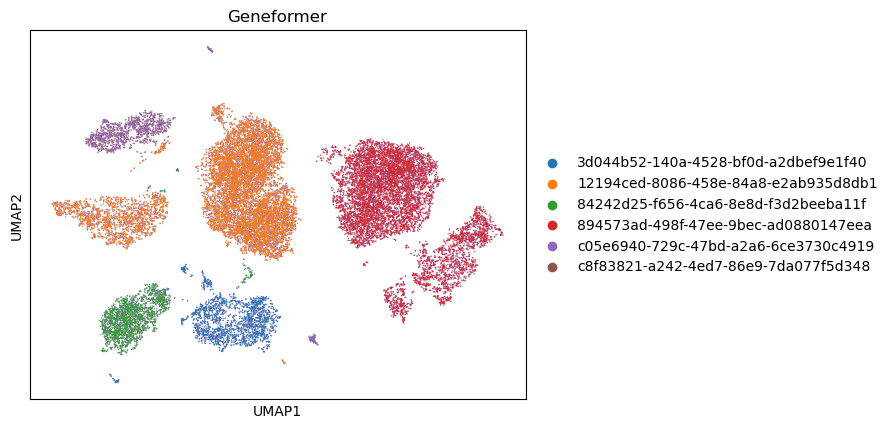

In [46]:
scanpy.pl.umap(adata, color="dataset_id", title="Geneformer")

#### AnnData embeddings via `ExperimentAxisQuery`

Using an `ExperimentAxisQuery` to get embeddings into an AnnData has the main advantage of inspecting the query in a lazy manner before loading all data into AnnData.

As a reminder this class offers a lazy interface to query Census based on cell and gene metadata, and provides access to the correspondong expression data, cell/gene metadata, and the embeddings.

Let's initiate a lazy query with the same filters as the previous example.

In [47]:
import tiledbsoma as soma

In [48]:
census_version = "2023-12-15"

In [49]:
organism = "homo_sapiens"

In [50]:
census = cellxgene_census.open_soma(census_version=census_version)

In [51]:
experiment = census["census_data"][organism]

In [52]:
query = experiment.axis_query(
    measurement_name="RNA",
    obs_query=soma.AxisQuery(value_filter="tissue_general == 'central nervous system'"),
)

Now, before downloading all the data we can take a look at different attributes, for example the number of cells in our query.

In [53]:
query.n_obs

31780

Then we create an AnnData, retrieve the embeddings and add them to the AnnData's obsm slot:

In [54]:
from cellxgene_census.experimental import get_embedding, get_embedding_metadata_by_name

In [55]:
emb_names = ["scvi", "geneformer"]

In [56]:
adata = query.to_anndata(X_name="raw", column_names={"obs": ["cell_type"]})

In [57]:
for embedding_name in ["scvi", "geneformer"]:
    metadata = get_embedding_metadata_by_name(embedding_name, "homo_sapiens", census_version=census_version)
    embedding_uri = (
        f"s3://cellxgene-contrib-public/contrib/cell-census/soma/{metadata['census_version']}/{metadata['id']}"
    )
    embedding = get_embedding(metadata["census_version"], embedding_uri, query.obs_joinids().to_numpy())
    adata.obsm[embedding_name] = embedding

In [58]:
adata

AnnData object with n_obs × n_vars = 31780 × 60664
    obs: 'cell_type', 'tissue_general'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'nnz', 'n_measured_obs'
    obsm: 'scvi', 'geneformer'

In [59]:
query.close()

In [60]:
census.close()

### Load an embedding into a dense NumPy array

To load a  embeddinng into a stand-alone numpy array you can select cells from the Census based on obs metadata, then given the resulting cells, use the `soma_joinid` values to download an embedding, and finally save as a dense NDArray.

Let's first select cells based on cell metadata.

In [61]:
census_version = "2023-12-15"

In [62]:
experiment_name = "homo_sapiens"

In [63]:
census = cellxgene_census.open_soma(census_version=census_version)

In [64]:
obs_df = cellxgene_census.get_obs(
    census,
    experiment_name,
    value_filter="tissue_general == 'central nervous system'",
    column_names=["soma_joinid", "cell_type"],
)

In [65]:
obs_df.head()

,soma_joinid,cell_type,tissue_general
0,8752190,ependymal cell,central nervous system
1,8752191,astrocyte,central nervous system
2,8752192,astrocyte,central nervous system
3,8752193,astrocyte,central nervous system
4,8752194,astrocyte,central nervous system


Now you can use the `soma_joinid` values to download the corresponding rows of the embedding matrix via `get_embedding`.

In [66]:
metadata = get_embedding_metadata_by_name("scvi", experiment_name, census_version=census_version)

In [67]:
embedding_uri = f"s3://cellxgene-contrib-public/contrib/cell-census/soma/{metadata['census_version']}/{metadata['id']}"

In [68]:
embedding = get_embedding(metadata["census_version"], embedding_uri, obs_df.soma_joinid.to_numpy())

And now we have a dense matrix with the embedding data.

In [69]:
embedding

array([[-6.17187500e-01,  3.82995605e-03, -7.50000000e-01, ...,
         7.50000000e-01,  9.39941406e-03,  2.71606445e-03],
       [ 3.39843750e-01,  4.71115112e-04, -8.32031250e-01, ...,
         8.00781250e-01, -7.55310059e-04,  8.85009766e-03],
       [ 4.10156250e-01, -2.42614746e-03, -5.00000000e-01, ...,
         9.45312500e-01, -2.53295898e-03,  1.12915039e-02],
       ...,
       [ 3.84765625e-01, -1.54113770e-03, -1.94531250e+00, ...,
        -2.38281250e-01, -1.03149414e-02,  2.28881836e-03],
       [ 8.94531250e-01, -7.14111328e-03,  5.78125000e-01, ...,
        -1.15234375e-01, -2.39562988e-03,  2.42614746e-03],
       [ 6.79687500e-01, -8.48388672e-03,  1.45312500e+00, ...,
        -1.19628906e-01,  6.62803650e-05, -1.88446045e-03]], dtype=float32)

In [70]:
embedding.shape

(31780, 50)

In [71]:
query.close()

In [72]:
census.close()